In [9]:
import numpy as np # Álgebra lineal
import pandas as pd # Manejo de datos
import matplotlib.pyplot as plt # Gráficos
import seaborn as sns # Más gráficos

from sklearn.model_selection import train_test_split # Dividir en conjuntos de entrenamiento y prueba
from sklearn.metrics import mean_absolute_error, r2_score # Error medio absoluto y R cuadrado para evaluar el modelo
from sklearn.preprocessing import StandardScaler # Estandarizar los datos numéricos
from sklearn.preprocessing import OneHotEncoder # Encodear datos categóricos
from sklearn.compose import ColumnTransformer # Aplicar diferentes transformaciones sobre un df
from sklearn.model_selection import cross_val_score # Evaluar el modelo de forma robusta
from sklearn.linear_model import LinearRegression # Regresión Lineal
from sklearn.tree import DecisionTreeRegressor # Regresor de arboles de decision
from sklearn.ensemble import RandomForestRegressor # Regresor de arboles aleatorios
from xgboost import XGBRegressor # Regresor de XGBoost
from sklearn.pipeline import Pipeline # Pipeline para simplicidad de aplicación
import warnings # Sacar los warnings
warnings.filterwarnings("ignore")

plt.style.use("ggplot")

## **CARGA DE DATOS**

In [10]:
# Ruta de los datos
ruta = r"C:\Users\Educa informatica\Downloads\car_price_dataset.csv"
# Lectura de los datos
cars = pd.read_csv(ruta)

## **ANÁLISIS EXPLORATORIO DE DATOS**

In [11]:
# Estructura del dataset
def estructura_dataset(df):
    print(f"Cantidad de filas: {df.shape[0]}")
    print(f"Cantidad de columnas: {df.shape[1]}")
    print(f"Cantidad de datos: {df.size}")
    print(f"Columnas: {df.columns}")
    
estructura_dataset(cars)

Cantidad de filas: 10000
Cantidad de columnas: 10
Cantidad de datos: 100000
Columnas: Index(['Brand', 'Model', 'Year', 'Engine_Size', 'Fuel_Type', 'Transmission',
       'Mileage', 'Doors', 'Owner_Count', 'Price'],
      dtype='object')


In [12]:
# Primera vista de los datos
cars.head(10)

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867
5,Toyota,Camry,2007,2.7,Petrol,Automatic,157889,4,4,7242
6,Honda,Civic,2010,3.4,Electric,Automatic,139584,3,1,11208
7,Kia,Sportage,2001,4.7,Electric,Semi-Automatic,157495,2,2,7950
8,Kia,Sportage,2014,2.6,Hybrid,Manual,98700,3,4,9926
9,Toyota,RAV4,2005,3.1,Petrol,Manual,107724,2,5,6545


In [13]:
# Valores nulos
cars.isnull().sum()

Brand           0
Model           0
Year            0
Engine_Size     0
Fuel_Type       0
Transmission    0
Mileage         0
Doors           0
Owner_Count     0
Price           0
dtype: int64

In [14]:
# Valores duplicados
cars.duplicated().sum()

0

In [15]:
# Información del dataset
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB


In [16]:
# Frecuencia de valores
for col in cars.columns:
    print(cars[col].value_counts())

Brand
Ford          1048
Audi          1038
Volkswagen    1020
Honda         1009
Chevrolet     1003
BMW            999
Hyundai        995
Kia            976
Toyota         970
Mercedes       942
Name: count, dtype: int64
Model
Accord      365
Fiesta      363
Impala      355
5 Series    353
Tiguan      352
Focus       351
Q5          350
A4          350
Elantra     347
Golf        339
A3          338
Optima      336
Civic       336
3 Series    335
Explorer    334
Malibu      333
Tucson      329
Passat      329
Rio         327
Corolla     325
RAV4        324
Camry       321
E-Class     321
Sonata      319
Equinox     315
GLA         315
Sportage    313
X5          311
CR-V        308
C-Class     306
Name: count, dtype: int64
Year
2002    462
2011    449
2023    448
2012    437
2017    433
2010    431
2005    431
2007    430
2015    426
2018    425
2013    422
2019    421
2014    417
2006    415
2020    415
2001    406
2009    399
2022    397
2016    395
2004    394
2000    393
2021    3

### VARIABLES CATEGÓRICAS

In [17]:
# Elegimos las variables categóricas
categoricas = [col for col in cars.columns if cars[col].dtype == "object"]

print(f"Cantidad de variables categóricas: {len(categoricas)}")
print(f"Variables categóricas: {categoricas}")

Cantidad de variables categóricas: 4
Variables categóricas: ['Brand', 'Model', 'Fuel_Type', 'Transmission']


In [18]:
# Valores únicos
for col in categoricas:
    print(col, "\n")
    print(cars[col].unique(), "\n")

Brand 

['Kia' 'Chevrolet' 'Mercedes' 'Audi' 'Volkswagen' 'Toyota' 'Honda' 'BMW'
 'Hyundai' 'Ford'] 

Model 

['Rio' 'Malibu' 'GLA' 'Q5' 'Golf' 'Camry' 'Civic' 'Sportage' 'RAV4'
 '5 Series' 'CR-V' 'Elantra' 'Tiguan' 'Equinox' 'Explorer' 'A3' '3 Series'
 'Tucson' 'Passat' 'Impala' 'Corolla' 'Optima' 'Fiesta' 'A4' 'Focus'
 'E-Class' 'Sonata' 'C-Class' 'X5' 'Accord'] 

Fuel_Type 

['Diesel' 'Hybrid' 'Electric' 'Petrol'] 

Transmission 

['Manual' 'Automatic' 'Semi-Automatic'] 



In [19]:
# Cardinalidad
for col in categoricas:
    print("Cardinalidad de", col, ":", cars[col].nunique())

Cardinalidad de Brand : 10
Cardinalidad de Model : 30
Cardinalidad de Fuel_Type : 4
Cardinalidad de Transmission : 3


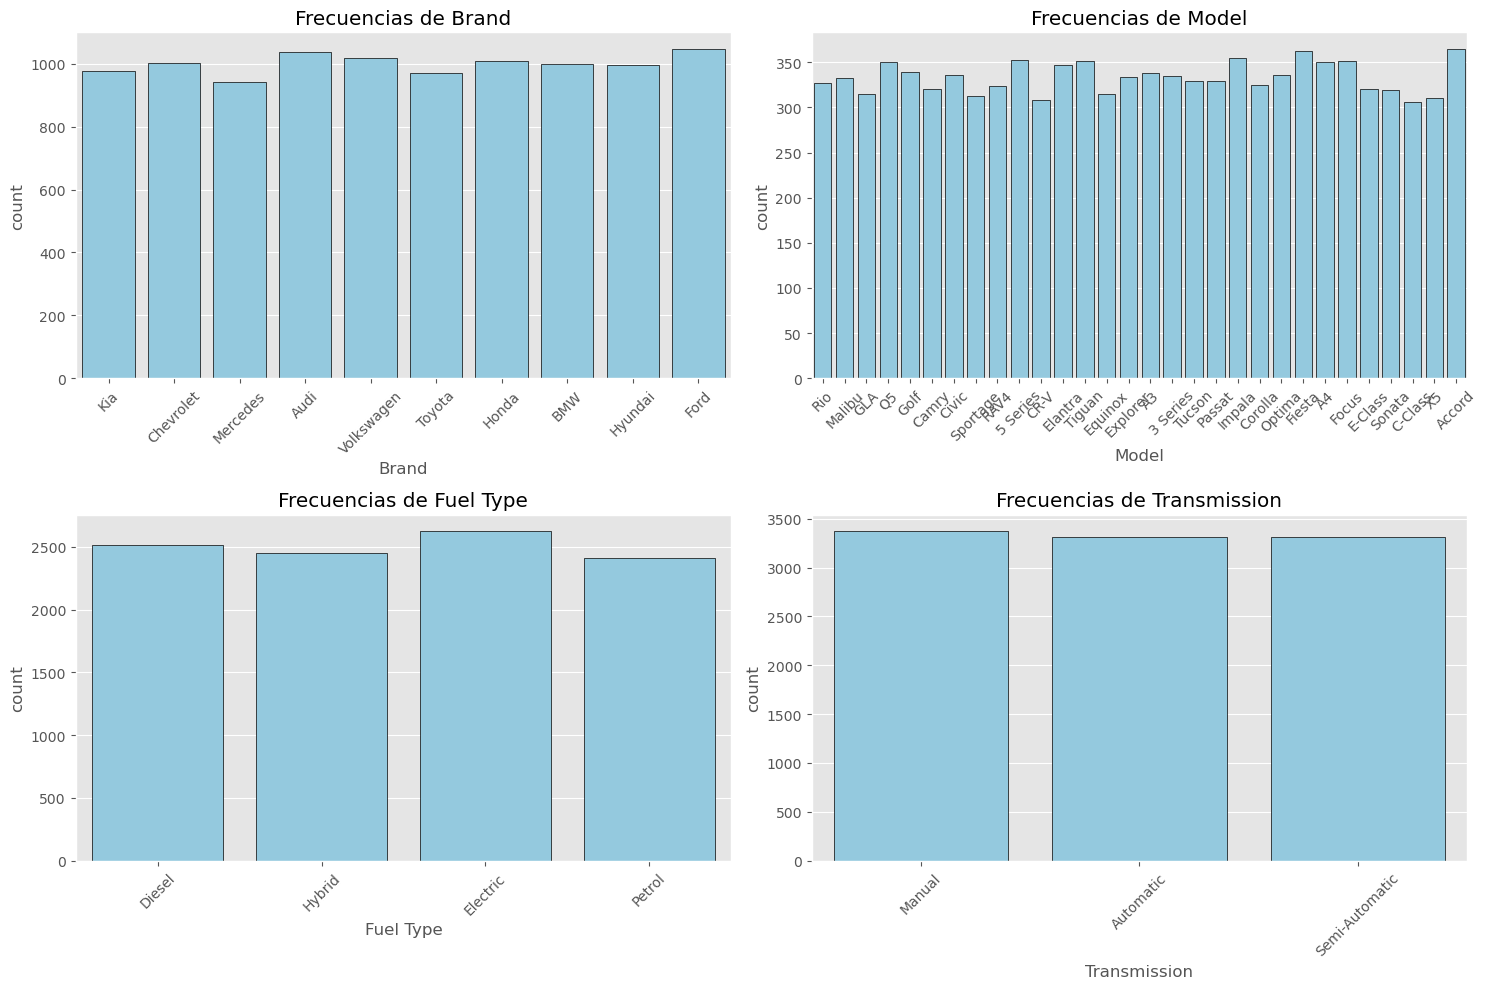

In [20]:
# Frecuencias de categorías
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(categoricas):
    ax = axes[i]
    sns.countplot(data=cars, x=col, color="skyblue", edgecolor="black", ax=ax)
    ax.set_title(f"Frecuencias de {col.replace('_', ' ')}")
    ax.set_xlabel(col.replace("_", " "))
    ax.tick_params(axis="x", rotation=45)
    
plt.tight_layout()

plt.show()

### VARIABLES NUMÉRICAS

In [21]:
# Elegimos las variables numéricas
numericas = [col for col in cars.columns if cars[col].dtype in ("int64", "float64")]

print(f"Cantidad de columnas numéricas: {len(numericas)}")
print(f"Columnas numéricas {numericas}")

Cantidad de columnas numéricas: 6
Columnas numéricas ['Year', 'Engine_Size', 'Mileage', 'Doors', 'Owner_Count', 'Price']


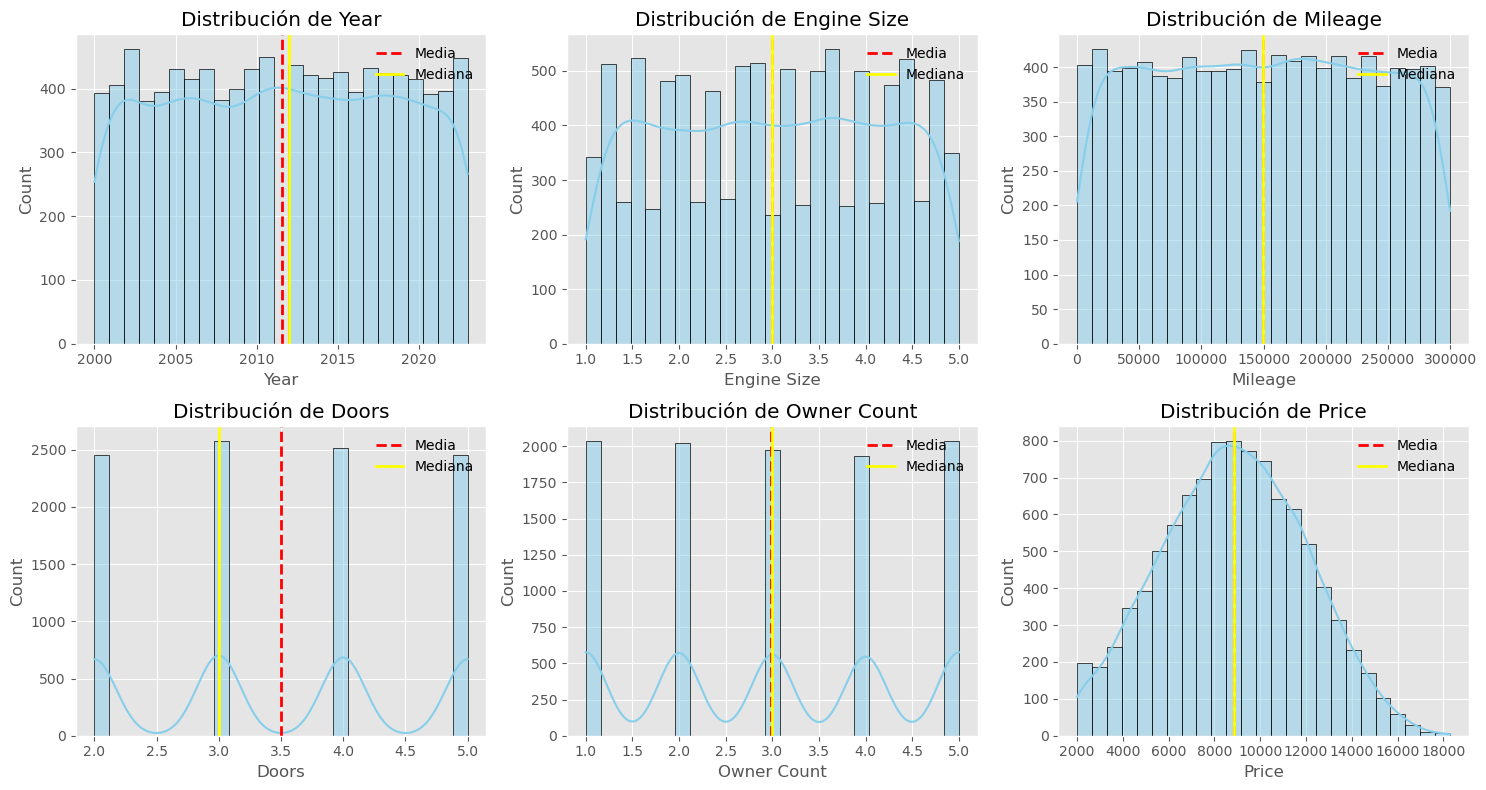

In [22]:
# Distribución
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for i, col in enumerate(numericas):
    ax=axes[i]
    sns.histplot(cars, x=col, color="skyblue", edgecolor="black", bins=25, kde=True, ax=ax)
    ax.axvline(cars[col].mean(), color="red", linestyle="--", linewidth=2, label="Media")
    ax.axvline(cars[col].median(), color="yellow", linewidth=2, label="Mediana")
    ax.set_title(f"Distribución de {col.replace('_', ' ')}")
    ax.set_xlabel(col.replace("_", " "))
    ax.legend(loc="upper right", frameon=False)
    
plt.tight_layout()

plt.show()

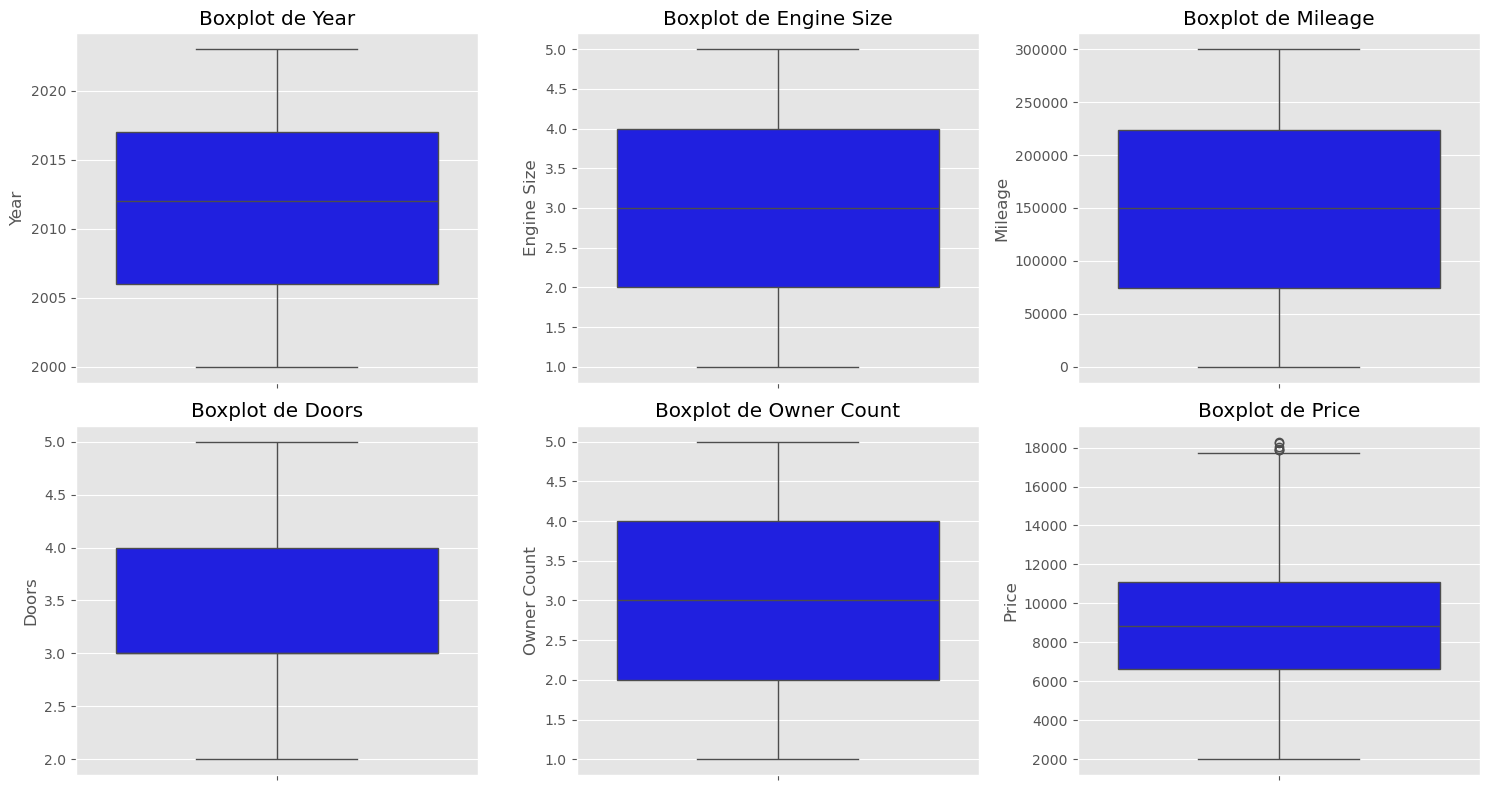

In [23]:
# Distribución estadística
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for i, col in enumerate(numericas):
    ax=axes[i]
    sns.boxplot(cars, y=col, color="blue", ax=ax)
    ax.set_title(f"Boxplot de {col.replace('_', ' ')}")
    ax.set_ylabel(col.replace("_", " "))
    
plt.tight_layout()

plt.show()

In [24]:
# Estadísticos mostrados en el boxplot (menos std)
cars.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,10000.0,2011.54370,6.897699,2000.0,2006.00,2012.0,2017.0,2023.0
Engine_Size,10000.0,3.00056,1.149324,1.0,2.00,3.0,4.0,5.0
Mileage,10000.0,149239.11180,86322.348957,25.0,74649.25,149587.0,223577.5,299947.0
Doors,10000.0,3.49710,1.110097,2.0,3.00,3.0,4.0,5.0
Owner_Count,10000.0,2.99110,1.422682,1.0,2.00,3.0,4.0,5.0
Price,10000.0,8852.96440,3112.596810,2000.0,6646.00,8858.5,11086.5,18301.0


In [25]:
# Detectar outliers
def conteo_outliers(df, columnas):
    outliers = {}
    for col in columnas:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        limite_inferior = q1 - iqr * 1.5
        limite_superior = q3 + iqr * 1.5
        
        conteo = df[(df[col] < limite_inferior) | (df[col] > limite_superior)]
        
        outliers[col] = conteo.shape[0]
        
    return outliers

conteo_outliers(cars, numericas)

{'Year': 0,
 'Engine_Size': 0,
 'Mileage': 0,
 'Doors': 0,
 'Owner_Count': 0,
 'Price': 6}

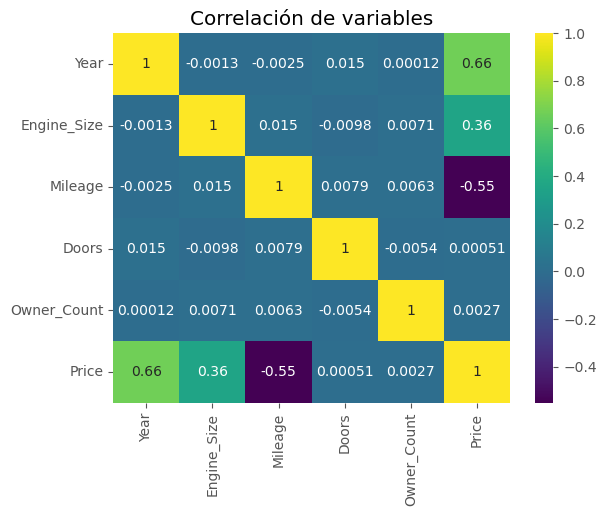

In [26]:
# Análisis bivariado / Correlación
correlacion = cars[numericas].corr()

sns.heatmap(correlacion, cmap="viridis", annot=True)
plt.title("Correlación de variables")

plt.show()

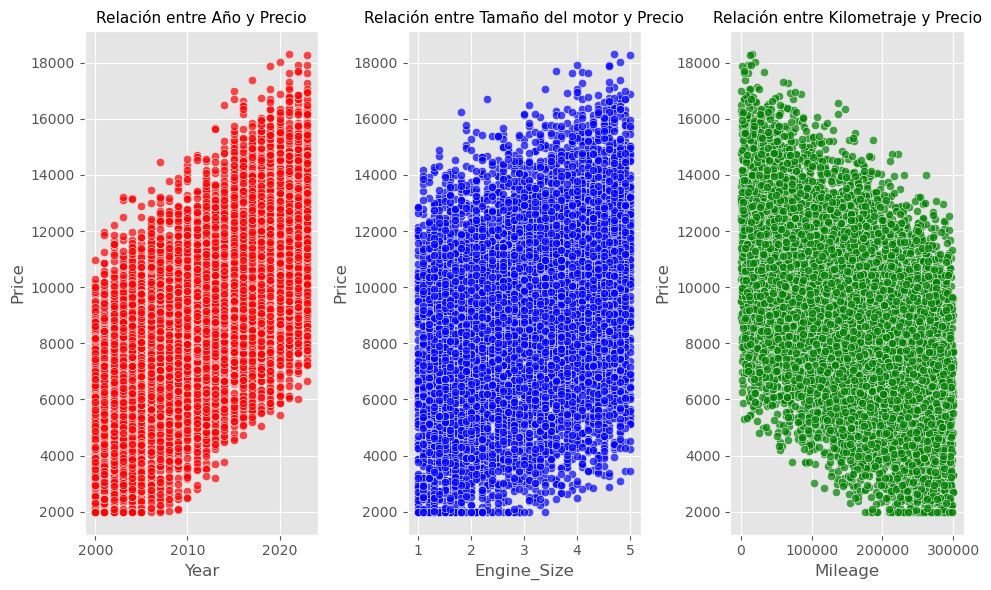

In [27]:
# Relación de algunas variables con variable target
fig, ax = plt.subplots(1, 3, figsize=(10, 6))

sns.scatterplot(data=cars, x="Year", y="Price", color="red", alpha=0.7, ax=ax[0])
ax[0].set_title("Relación entre Año y Precio", fontsize=11)
sns.scatterplot(data=cars, x="Engine_Size", y="Price", color="blue", alpha=0.7, ax=ax[1])
ax[1].set_title("Relación entre Tamaño del motor y Precio", fontsize=11)
sns.scatterplot(data=cars, x="Mileage", y="Price", color="green", alpha=0.7, ax=ax[2])
ax[2].set_title("Relación entre Kilometraje y Precio", fontsize=11)

plt.tight_layout()

plt.show()

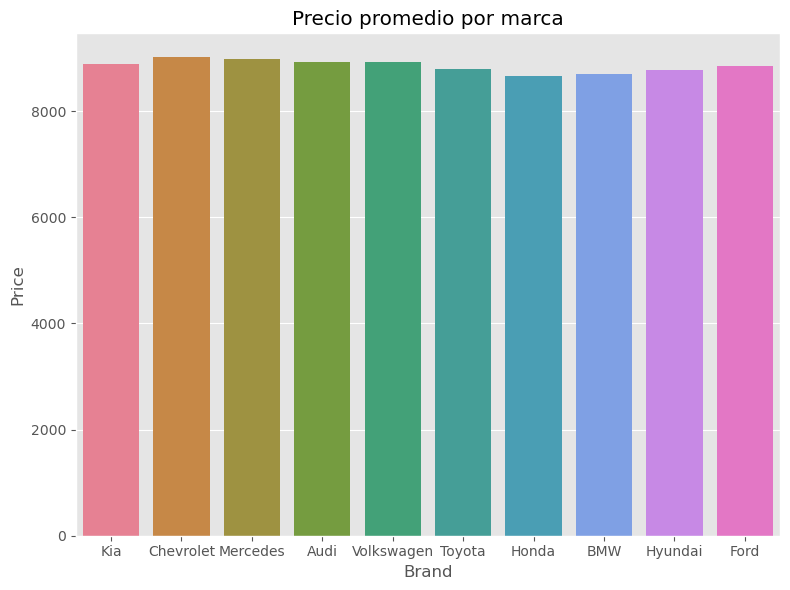

In [ ]:
#Year","Fuel_Type","Transmission","Doors"
plt.figure(figsize=(8, 6))
sns.barplot(cars, x="Brand", y="Price", hue="Brand", errorbar=None)
plt.title("Precio promedio por marca")

plt.tight_layout()

plt.show()

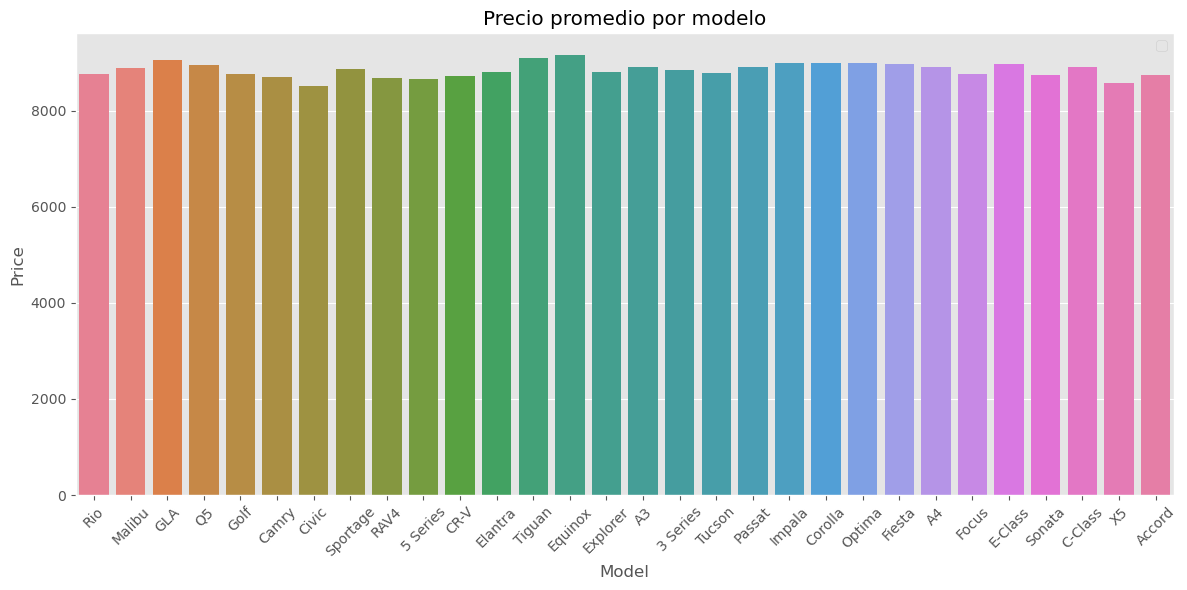

In [82]:
plt.figure(figsize=(12, 6))
sns.barplot(cars, x="Model", y="Price", hue="Model", errorbar=None)
plt.title("Precio promedio por modelo")
plt.xticks(rotation=45)

plt.legend("")

plt.tight_layout()

plt.show()

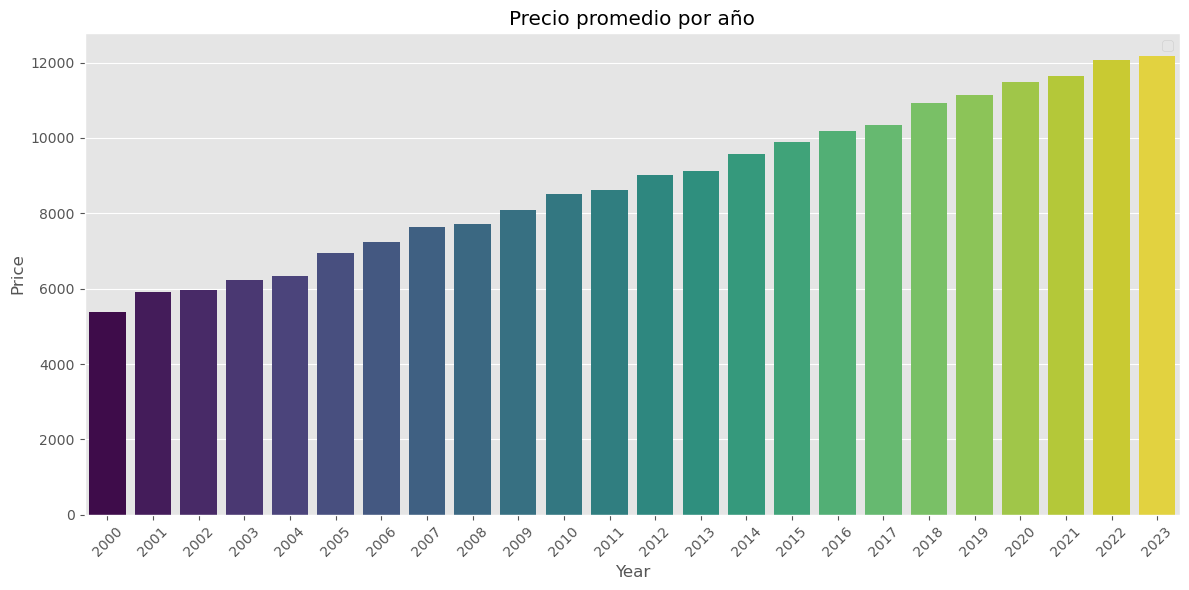

In [83]:
plt.figure(figsize=(12, 6))
sns.barplot(cars, x="Year", y="Price", hue="Year", errorbar=None, palette="viridis")
plt.title("Precio promedio por año")
plt.xticks(rotation=45)

plt.legend("")

plt.tight_layout()

plt.show()

## **CARACTERÍSTICAS Y OBJETIVO**

In [28]:
X = cars.drop("Price", axis=1)

y = cars["Price"]

## **CONJUNTOS DE ENTRENAMIENTO Y PRUEBA**

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

for df in [X_train, X_test, y_train, y_test]:
    print(df.shape)

(8000, 9)
(2000, 9)
(8000,)
(2000,)


## **FEATURE ENGINEERING**

In [30]:
numericas = [col for col in X_train.columns if X_train[col].dtype in ("int64", "float64")] # Eliminamos precio basicamente

categoricas = [col for col in X_train.columns if X_train[col].dtype == "object"] # Eliminamos precio basicamente
# One Hot Encoding para variables categoricas
transformador_categoricas = Pipeline(steps=[
    ("onehot", OneHotEncoder(drop="first", handle_unknown="ignore"))
])
# Estandarizar los datos numéricos
transformador_numericas = Pipeline(steps=[
    ("scaler", StandardScaler())
])
# Dejarlo preparado para el pipeline
preprocesador = ColumnTransformer(
    transformers=[
        ("num", transformador_numericas, numericas),
        ("cat", transformador_categoricas, categoricas)
    ]
)

## **MODELOS Y MÉTRICAS**

In [31]:
# Almacenar los modelos, sus MAE y R^2
modelos = []
# Pipeline regresión lineal
linear_reg_pipeline = Pipeline(steps=[
    ("preprocessor", preprocesador),
    ("model", LinearRegression())
])
# Ajustar el modelo a los datos de entrenamiento
linear_reg_pipeline.fit(X_train, y_train)
# Predicción
y_pred = linear_reg_pipeline.predict(X_test)
# Error medio absoluto
mae_lr = mean_absolute_error(y_test, y_pred)
# R^2 score
r2_lr = r2_score(y_test, y_pred)

print(f"MAE de Regresión Lineal: {round(mae_lr, 4)}")
print(f"R2 de Regresión Lineal: {round(r2_lr, 4)}")

modelos.append({
    "Modelo": "Regresión Lineal",
    "MAE": mae_lr,
    "R2": r2_lr
})

MAE de Regresión Lineal: 20.5894
R2 de Regresión Lineal: 0.9994


In [32]:
# Pipeline Árboles de decisión
decision_tree_pipeline = Pipeline(steps=[
    ("preprocessor", preprocesador),
    ("model", DecisionTreeRegressor(criterion="absolute_error", max_depth=5, min_samples_split=2, min_samples_leaf=1))
])
# Ajustar el modelo a los datos de entrenamiento
decision_tree_pipeline.fit(X_train, y_train)
# Predicción
y_pred_dt = decision_tree_pipeline.predict(X_test)
# Error absoluto medio
mae_dt = mean_absolute_error(y_test, y_pred_dt)
# R^2 score
r2_dt = r2_score(y_test, y_pred_dt)

print(f"MAE de Árboles de decisión: {round(mae_dt, 4)}")
print(f"R2 de Árboles de decisión: {round(r2_dt, 4)}")

modelos.append({
    "Modelo": "Árboles de decisión",
    "MAE": mae_dt,
    "R2": r2_dt
})

MAE de Árboles de decisión: 1144.9575
R2 de Árboles de decisión: 0.788


In [33]:
# Pipeline Random Forest
random_forest_pipeline = Pipeline(steps=[
    ("preprocessor", preprocesador),
    ("model", RandomForestRegressor(n_estimators=200, max_depth=None))
])
# Ajustar el modelo a los datos de entrenamiento
random_forest_pipeline.fit(X_train, y_train)
# Predicción
y_pred_rf = random_forest_pipeline.predict(X_test)
# Error absoluto medio
mae_rf = mean_absolute_error(y_test, y_pred_rf)
# R^2 score
r2_rf = r2_score(y_test, y_pred_rf)

print(f"MAE de Random Forest: {round(mae_rf, 4)}")
print(f"R2 de Random Forest: {round(r2_rf, 4)}")

modelos.append({
    "Modelo": "Random Forest",
    "MAE": mae_rf,
    "R2": r2_rf
})

MAE de Random Forest: 441.4867
R2 de Random Forest: 0.9686


In [34]:
# Pipeline XGBRegressor
xgb_pipeline = Pipeline(steps=[
    ("preprocessor", preprocesador),
    ("model", XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, subsample=0.8))
])
# Ajustar el modelo a los datos de entrenamiento
xgb_pipeline.fit(X_train, y_train)
# Predicción
y_pred_xgb = xgb_pipeline.predict(X_test)
# Error absoluto medio
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
# R^2 score
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"MAE de Random Forest: {round(mae_xgb, 4)}")
print(f"R2 de Random Forest: {round(r2_xgb, 4)}")

modelos.append({
    "Modelo": "XGBRegressor",
    "MAE": mae_xgb,
    "R2": r2_xgb
})

MAE de Random Forest: 137.2183
R2 de Random Forest: 0.9968


## **ANÁLISIS DE MODELOS**

In [46]:
# Analizamos los modelos
modelos = pd.DataFrame(modelos)
modelos.sort_values(by="MAE", inplace=True)
modelos.head()

,Modelo,MAE,R2
0,Regresión Lineal,20.589430,0.999413
3,XGBRegressor,137.218292,0.996840
2,Random Forest,441.486662,0.968593
1,Árboles de decisión,1144.957500,0.787997


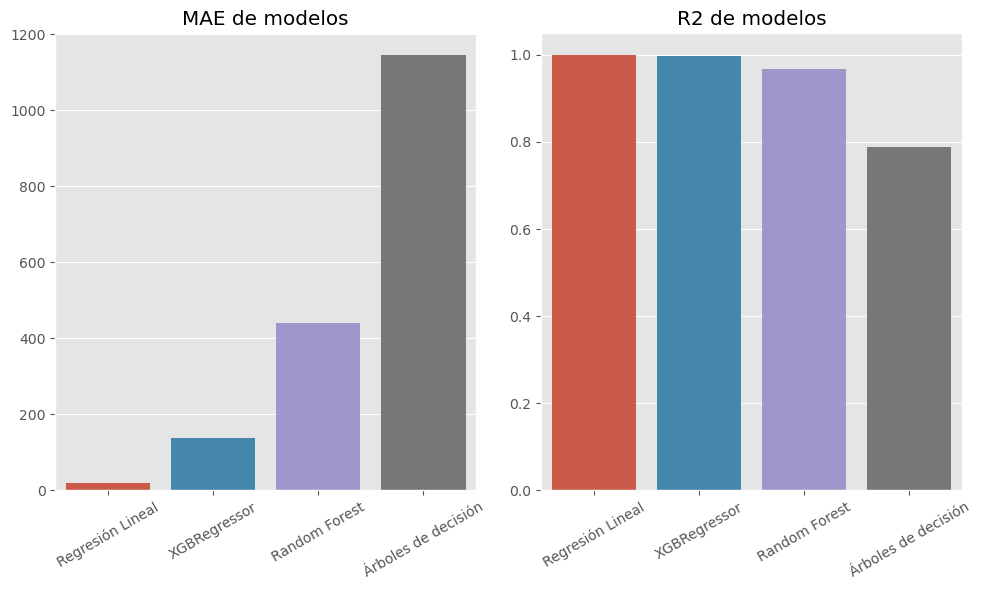

In [59]:
# Gráfico de modelos
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
sns.barplot(modelos, x="Modelo", y="MAE", hue="Modelo", ax=ax[0])
ax[0].set_title("MAE de modelos")
ax[0].set_xlabel("")
ax[0].set_ylabel("")
ax[0].tick_params(axis="x", rotation=30)
sns.barplot(modelos, x="Modelo", y="R2", hue="Modelo", ax=ax[1])
ax[1].set_title("R2 de modelos")
ax[1].set_xlabel("")
ax[1].set_ylabel("")
ax[1].tick_params(axis="x", rotation=30)

plt.tight_layout()

plt.show()

In [60]:
# Valores reales vs predichos de regresión lineal
df_predicciones = pd.DataFrame({"Actual Value": y_test, "Predicted Value":y_pred, "Difference":y_test - y_pred})

df_predicciones

,Actual Value,Predicted Value,Difference
9394,6988,7006.718992,-18.718992
898,10593,10597.585592,-4.585592
2398,8689,8708.477401,-19.477401
5906,7338,7352.153630,-14.153630
2343,10270,10272.359552,-2.359552
...,...,...,...
1037,6344,6361.601310,-17.601310
2899,3913,3939.827119,-26.827119
9549,9038,9053.807537,-15.807537
2740,7329,7361.060207,-32.060207


## **PREDECIR CON VALORES NUEVOS**

In [ ]:
# Definir los valores posibles para cada columna
brands = ['Kia', 'Chevrolet', 'Mercedes', 'Audi', 'Volkswagen', 'Toyota', 'Honda', 'BMW', 'Hyundai', 'Ford']
models = ['Rio', 'Malibu', 'GLA', 'Q5', 'Golf', 'Camry', 'Civic', 'Sportage', 'RAV4', '5 Series', 'CR-V', 'Elantra', 'Tiguan', 
          'Equinox', 'Explorer', 'A3', '3 Series', 'Tucson', 'Passat', 'Impala', 'Corolla', 'Optima', 'Fiesta', 'A4', 'Focus', 
          'E-Class', 'Sonata', 'C-Class', 'X5', 'Accord']
fuel_types = ['Diesel', 'Hybrid', 'Electric', 'Petrol']
transmissions = ['Manual', 'Automatic', 'Semi-Automatic']

# Generar un DataFrame con valores aleatorios para las columnas
np.random.seed(42)  # Fijar la semilla para reproducibilidad

data = {
    'Brand': np.random.choice(brands, 10),
    'Model': np.random.choice(models, 10),
    'Fuel_Type': np.random.choice(fuel_types, 10),
    'Transmission': np.random.choice(transmissions, 10),
    'Year': np.random.uniform(2000, 2023, 10),
    'Engine_Size': np.random.uniform(1, 5, 10),
    'Mileage': np.random.uniform(25000, 300000, 10),
    'Doors': np.random.choice([2, 3, 4, 5], 10),
    'Owner_Count': np.random.randint(1, 6, 10),
}

nuevo_df = pd.DataFrame(data)

nuevo_df

,Brand,Model,Fuel_Type,Transmission,Year,Engine_Size,Mileage,Doors,Owner_Count
0,Honda,Q5,Hybrid,Manual,2014.222878,2.541666,232724.387837,4,5
1,Audi,Sportage,Hybrid,Manual,2008.796626,1.063865,141917.865485,5,2
2,BMW,A4,Petrol,Semi-Automatic,2022.614310,1.923575,82183.957289,3,5
3,Volkswagen,GLA,Petrol,Semi-Automatic,2010.735547,1.964102,181117.590150,4,2
4,Honda,Optima,Diesel,Semi-Automatic,2019.778629,3.733054,33611.155425,5,1
5,Ford,Corolla,Diesel,Automatic,2015.647073,3.439987,256628.313014,2,4
6,Mercedes,Malibu,Petrol,Semi-Automatic,2010.361483,4.332780,148682.386677,3,4
7,Honda,A4,Hybrid,Automatic,2000.305094,1.693459,133666.314900,5,4
8,BMW,Elantra,Hybrid,Automatic,2021.670640,2.564242,279831.188093,2,5
9,Volkswagen,Accord,Diesel,Semi-Automatic,2012.955629,1.728944,224999.798861,5,1


In [ ]:
# Predecir nuevos valores
nuevas_preds = linear_reg_pipeline.predict(nuevo_df)

nuevo_df["Predicted Price"] = nuevas_preds

nuevo_df

,Brand,Model,Fuel_Type,Transmission,Year,Engine_Size,Mileage,Doors,Owner_Count,Predicted Price
0,Honda,Q5,Hybrid,Manual,2014.222878,2.541666,232724.387837,4,5,7266.188241
1,Audi,Sportage,Hybrid,Manual,2008.796626,1.063865,141917.865485,5,2,5989.480139
2,BMW,A4,Petrol,Semi-Automatic,2022.614310,1.923575,82183.957289,3,5,11155.184947
3,Volkswagen,GLA,Petrol,Semi-Automatic,2010.735547,1.964102,181117.590150,4,2,5694.877010
4,Honda,Optima,Diesel,Semi-Automatic,2019.778629,3.733054,33611.155425,5,1,13080.977650
5,Ford,Corolla,Diesel,Automatic,2015.647073,3.439987,256628.313014,2,4,8610.729802
6,Mercedes,Malibu,Petrol,Semi-Automatic,2010.361483,4.332780,148682.386677,3,4,8579.400087
7,Honda,A4,Hybrid,Automatic,2000.305094,1.693459,133666.314900,5,4,5728.367427
8,BMW,Elantra,Hybrid,Automatic,2021.670640,2.564242,279831.188093,2,5,10062.524516
9,Volkswagen,Accord,Diesel,Semi-Automatic,2012.955629,1.728944,224999.798861,5,1,5244.100772
